 # NLP Model Implementation Using the QVC Attention Mechanism

This project focuses on developing a Natural Language Processing (NLP) model using the QVC (Query, Value, Context) attention mechanism from scratch using Python and Numpy. The attention mechanism is a critical component in modern NLP models, enhancing their ability to focus on different parts of the input sequence to make more accurate predictions.

## Key Components:

- **QVC Attention Mechanism**: Understanding and implementing the Query, Value, and Context (QVC) attention mechanism from scratch.
- **Model Architecture**: Building the architecture of the NLP model utilizing QVC attention.
- **Training and Evaluation**: Training the model with appropriate datasets and evaluating its performance.

This project aims to provide a comprehensive guide to implementing and experimenting with attention mechanisms in NLP.


# Preparing Input Data for NLP Model

In this section, we are preparing the input data for our NLP model by defining arrays representing word embeddings and combining them into a structured format.

 


Let's consider as starting point for example 3 phrases made of 4 words each where each word have embedding size 5:

In [8]:
import sys
sys.path.append('c:\\python312\\lib\\site-packages')
import numpy as np
 

# Phrase 1
word1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
word2 = np.array([0.5, 0.4, 0.7,0.3, 0.2])
word3 = np.array([0.2,0.7, 0.3, 0.5, 0.4])
word4 = np.array([0.4, 0.1,0.7, 0.2, 0.5])

# Phrase 2
word5 = np.array([0.1, 0.9, 0.3, 0.4, 0.5])
word6 = np.array([0.4, 0.4, 0.7,0.3, 0.8])
word7 = np.array([0.2,0.7, 0.4, 0.5, 0.4])
word8 = np.array([0.4, 0.5,0.7, 0.7, 0.8])

# Phrase 3
word9 = np.array([0.1, 0.2, 0.3, 0.8, 0.5])
word10 = np.array([0.4, 0.5, 0.7,0.3, 0.8])
word11 = np.array([0.9,0.7, 0.3, 0.5, 0.4])
word12 = np.array([0.4, 0.5,0.1, 0.7, 0.4])
 

Finally, we combine all these word embeddings into a single matrix. This matrix, `inputs`, has the shape `(3, 4, 5)`, where:
- `3` represents the number of phrases (batch size),
- `4` is the number of words in each phrase (sequence length),
- `5` is the dimensionality of each word embedding.


In [9]:
inputs = np.stack([[word1, word2, word3, word4],[word5, word6, word7, word8],[word9, word10, word11, word12]])
inputs, inputs.shape

(array([[[0.1, 0.2, 0.3, 0.4, 0.5],
         [0.5, 0.4, 0.7, 0.3, 0.2],
         [0.2, 0.7, 0.3, 0.5, 0.4],
         [0.4, 0.1, 0.7, 0.2, 0.5]],
 
        [[0.1, 0.9, 0.3, 0.4, 0.5],
         [0.4, 0.4, 0.7, 0.3, 0.8],
         [0.2, 0.7, 0.4, 0.5, 0.4],
         [0.4, 0.5, 0.7, 0.7, 0.8]],
 
        [[0.1, 0.2, 0.3, 0.8, 0.5],
         [0.4, 0.5, 0.7, 0.3, 0.8],
         [0.9, 0.7, 0.3, 0.5, 0.4],
         [0.4, 0.5, 0.1, 0.7, 0.4]]]),
 (3, 4, 5))

Implementing the classifier model class we can start by adding these parameters:

In [10]:
class QKVAttentionClassifier:
    def __init__(self,word_len,batch_size):
        self.word_len=word_len
        self.batch_size = batch_size 

# Attention Head

An attention head in the attention mechanism is a crucial component of the model that computes the weighted sum of the values based on the similarity between the queries and keys.
The primary goal of the attention mechanism is to derive better and richer representations of word embeddings. By focusing on different parts of the input sequence, the attention mechanism helps the model capture intricate relationships and dependencies between words. This enhanced representation improves the model’s ability to understand context and perform various NLP tasks more effectively.

The output of an attention head can be represented mathematically as follows:

1. **Calculate the Scores**: The attention scores are computed as the dot product of the query matrix \\( Q \\) with the transpose of the key matrix \\( K \\). To ensure that the gradients are well-behaved and to prevent excessively large values in the softmax step, the dot product is scaled by \\( \sqrt{d_k} \\):
  $$
  \text{Scores} = \frac{QK^T}{\sqrt{d_k}}
  $$
   where \\( d_k \\) refers to the dimensionality of the key vectors. Specifically, \\( d_k \\) is equal to the number of neurons in the key matrix \\( K \\). This dimension is crucial for scaling the attention scores, which helps in stabilizing the gradients during training.

2. **Apply Softmax**: Apply the softmax function to the scores to get the attention weights:
   $$
   \text{Attention Weights} = \text{softmax}(\text{Scores})
   $$

3. **Compute the Weighted Sum**: Multiply the attention weights by the value matrix \\( V \\) to get the weighted sum:
   $$
   \text{Output} = \text{Attention Weights} \times V
   $$

Here’s a more detailed breakdown:

- **Query Matrix \( Q \)**: Represents the queries for which we are computing attention.
- **Key Matrix \( K \)**: Represents the keys that are used to compute the similarity with the queries.
- **Value Matrix \( V \)**: Contains the values that will be weighted by the attention weights to produce the final output.

While the query and key matrices have dimensions \\(\text{word\_length} \times d_k\\), the value matrix \\( V \\) has a second dimension \\( d_v \\) that specifies how the words will be represented after attention. This dimension \\( d_v \\) influences the output representation of the words, allowing the model to create a more meaningful and rich representation based on the attention mechanism.
 

![Alt text](data/Attention1.png)

In [11]:
word2vec_len=5
dk=3
dv=3
Q = np.random.rand(word2vec_len, dk)/ np.sqrt(word2vec_len)
K = np.random.rand(word2vec_len, dk)/ np.sqrt(word2vec_len)
V = np.random.rand(word2vec_len, dv)/ np.sqrt(word2vec_len)

Adding Q,K,V to the classifier we have:


In [12]:
class QKVAttentionClassifier:
    def __init__(self,word2vec_len,batch_size,dk,dv):
        self.word2vec_len=word2vec_len
        self.batch_size = batch_size
        self.dk=dk
        self.dv = dv
        self.Q = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.K = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.V = np.random.rand(self.word2vec_len, self.dv) / np.sqrt(self.word_len)

## Forward Pass in Attention Mechanism

The `forward` method in the attention mechanism is responsible for computing the query, key, and value vectors from the input embeddings. Let’s break down the code provided:


In [13]:
Qval=np.matmul(inputs, Q)
Qval,Qval.shape

(array([[[0.44473742, 0.37359187, 0.25751621],
         [0.51669328, 0.43555713, 0.38881235],
         [0.48573823, 0.4871934 , 0.39845243],
         [0.53737207, 0.40425741, 0.28572654]],
 
        [[0.47313716, 0.48043332, 0.36058557],
         [0.67278976, 0.56595421, 0.38165137],
         [0.52791053, 0.49910014, 0.40448538],
         [0.84843998, 0.73419367, 0.55297242]],
 
        [[0.61633053, 0.52656827, 0.41411307],
         [0.67684686, 0.58121727, 0.39637557],
         [0.51793614, 0.66170304, 0.62502174],
         [0.48827537, 0.5592019 , 0.49997065]]]),
 (3, 4, 3))

In [14]:
Kval=np.dot(inputs, K)
Kval

array([[[0.35428141, 0.39431358, 0.45727823],
        [0.34258028, 0.48016216, 0.5050268 ],
        [0.41145235, 0.41399978, 0.4950547 ],
        [0.38771346, 0.55076047, 0.54195111]],

       [[0.41939644, 0.43572525, 0.46405562],
        [0.56487549, 0.70118634, 0.69783149],
        [0.41238564, 0.45133982, 0.51926323],
        [0.66900109, 0.76709871, 0.87411652]],

       [[0.44910486, 0.45430999, 0.63259506],
        [0.57417764, 0.7071023 , 0.69879968],
        [0.61308215, 0.5143352 , 0.67347391],
        [0.49600173, 0.38615326, 0.58333657]]])

In [15]:
Vval=np.dot(inputs, V)
Vval

array([[[0.24945759, 0.3264096 , 0.30551172],
        [0.33354926, 0.57969358, 0.51066333],
        [0.43879667, 0.5573187 , 0.43749923],
        [0.22767624, 0.48913361, 0.42671237]],

       [[0.47291493, 0.62542961, 0.4430046 ],
        [0.37930133, 0.70048447, 0.5263831 ],
        [0.44471154, 0.57612734, 0.47861369],
        [0.51692787, 0.74651025, 0.65648862]],

       [[0.35516165, 0.32971824, 0.4159754 ],
        [0.41122381, 0.74320161, 0.54602494],
        [0.5305753 , 0.86499418, 0.51127101],
        [0.44219649, 0.52382873, 0.39229612]]])

Having the values of the \\(Q\\), \\(K\\), \\(V\\) matrices and the \\(dk\\) values we can calculate the scores:
$$
  \text{QKscaled} = \frac{QK^T}{\sqrt{d_k}}
  $$

In [16]:
QKscaled=np.matmul(Qval, np.transpose(Kval, (0, 2, 1)))/np.sqrt(K.shape[1])
QKscaled

array([[[0.24400618, 0.26661778, 0.2685486 , 0.29892398],
        [0.30749464, 0.33631094, 0.33798004, 0.37581685],
        [0.31546339, 0.34731391, 0.34572418, 0.3883234 ],
        [0.27738312, 0.30166652, 0.305947  , 0.33823788]],

       [[0.33203456, 0.49407606, 0.34594394, 0.57750203],
        [0.40753633, 0.60229766, 0.42208001, 0.70312463],
        [0.36175501, 0.53718318, 0.37701023, 0.62908036],
        [0.53829217, 0.79671514, 0.55910227, 0.93194068]],

       [[0.44917166, 0.58635862, 0.53554329, 0.43336163],
        [0.47271896, 0.62157387, 0.56629507, 0.45690145],
        [0.53613416, 0.69400048, 0.62285148, 0.5063443 ],
        [0.45588548, 0.5918701 , 0.53329112, 0.43288235]]])

and finally the \\(attention\\) \\(weights\\) as:
$$
  \text{Attention weights} =\sigma( \frac{QK^T}{\sqrt{d_k}})
  $$

In [17]:
import numpy as np

def softmax(x, axis=-1):
    # Subtract the max value for numerical stability
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)

Attention_weights=softmax(QKscaled)
Attention_weights

array([[[0.24365468, 0.24922687, 0.24970854, 0.25740991],
        [0.24207796, 0.24915524, 0.24957145, 0.25919535],
        [0.24162373, 0.24944344, 0.2490472 , 0.25988563],
        [0.24293656, 0.2489081 , 0.24997583, 0.25817951]],

       [[0.22380706, 0.26317674, 0.22694183, 0.28607437],
        [0.21864673, 0.26566036, 0.2218499 , 0.29384301],
        [0.22155293, 0.26403713, 0.22495869, 0.28945125],
        [0.20840741, 0.26986392, 0.21278983, 0.30893885]],

       [[0.23687879, 0.27171006, 0.25824796, 0.23316318],
        [0.23568754, 0.27351647, 0.25880711, 0.23198888],
        [0.23628108, 0.27668742, 0.25768539, 0.22934611],
        [0.23790243, 0.27255631, 0.25704888, 0.23249239]]])

and finally the \\(Attention\\) value as:
$$
  \text{Attention} =\sigma( \frac{QK^T}{\sqrt{d_k}})V
  $$

In [18]:
Attention=np.matmul(Attention_weights, Vval)
Attention

array([[[0.31208834, 0.48908152, 0.42079767],
        [0.31201747, 0.48932226, 0.42098128],
        [0.31192741, 0.48938652, 0.42105487],
        [0.31209538, 0.48918773, 0.42086083]],

       [[0.45446845, 0.66863162, 0.53410138],
        [0.45472148, 0.67000971, 0.53578562],
        [0.45459247, 0.66920285, 0.53482341],
        [0.45524791, 0.6725997 , 0.53903621]],

       [[0.43598784, 0.62555917, 0.47039993],
        [0.43608499, 0.62637745, 0.47071594],
        [0.43583598, 0.62657516, 0.47108401],
        [0.43576656, 0.62513703, 0.4704116 ]]])

# Computing Phrase Representation from Attention Scores

In the attention mechanism, once the attention scores are computed and applied, we often need to summarize or aggregate these scores to obtain a representation of the entire phrase. Here’s how we compute the `phrase_representation`:

### Context

Given an `Attention` matrix that represents the attention weights applied to each word in a phrase, the goal is to aggregate these weights to obtain a single representation for the phrase.

### Computing Phrase Representation

1. **Attention Matrix**:
   - **Shape**: \\((\text{batch\_size}, \text{sequence\_length}, \text{embedding\_dim})\\) 
   - **Purpose**: Contains the attention weights for each word in each phrase. Each entry in this matrix represents the weighted influence of words in the phrase.

2. **Phrase Representation Calculation**:
   - To obtain a single representation for each phrase, we compute the average of the attention weights along the sequence length dimension.

   ```python
   phrase_representation = np.mean(Attention, axis=1)


![Alt text](data/Attention2.png)

In [19]:
phrase_representation = np.mean(Attention, axis=1)
print("Phrase Representation:")
print(phrase_representation)

Phrase Representation:
[[0.31203215 0.48924451 0.42092366]
 [0.45475758 0.67011097 0.53593665]
 [0.43591884 0.6259122  0.47065287]]


At this point, we have computed the following:

- **Attention Mechanism**:
  - `Qval`: The result of multiplying the input with the query weight matrix \( Q \).
  - `Kval`: The result of multiplying the input with the key weight matrix \( K \).
  - `Vval`: The result of multiplying the input with the value weight matrix \( V \).
  - `QKscaled`: The scaled dot product of `Qval` and `Kval`, normalized by the square root of the dimensionality of the key vectors \( d_k \).
  - `attention_weights`: The result of applying the softmax function to `QKscaled` to get attention weights.
  - `attention`: The result of multiplying `attention_weights` with `Vval`.
We can now add these parts to the classifier model:

In [20]:
class QKVAttentionClassifier:
    def __init__(self,word2vec_len,batch_size,dk,dv):
        self.word2vec_len=word2vec_len
        self.batch_size = batch_size
        self.dk=dk
        self.dv = dv
        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.K = np.random.rand(self.word2vec_len, self.dk) / np.sqrt(self.word_len)
        self.V = np.random.rand(self.word2vec_len, self.dv) / np.sqrt(self.word_len)

    
    def AttentionHead(self, Inputs):
        self.Qval = np.dot(Inputs, self.Q)
        self.Kval = np.dot(Inputs, self.K)
        self.Vval = np.dot(Inputs, self.V) 
        QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1]) 
        self.Attention_weights = self.softmax(QKscaled) 
        return np.matmul(self.Attention_weights, self.Vval)
    
    def forward(self, Inputs):
        Attention = self.AttentionHead(Inputs)
        self.phrase_representation = np.mean(Attention, axis=1)

With these computations complete, we are now ready to feed the `phrase_rep` into the linear layer for further processing.

![Alt text](data/txtclass.png)

In [21]:
num_classes = 2  # Example number of classes (binary classification)
linearlayer= np.random.rand(dv, num_classes)   
linear_bias = np.random.rand(num_classes)

In [22]:
Sigma_Zout=softmax(np.matmul(phrase_representation, linearlayer) + linear_bias)
Sigma_Zout

array([[0.76429305, 0.23570695],
       [0.79276488, 0.20723512],
       [0.78322489, 0.21677511]])

We add the linearlayer and Sigma_Zout calculation to the classifier:


In [23]:
class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):

        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase

        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  
        self.K = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  
        self.V = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes) 
        
    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output

    def forward(self, Inputs):
        Attention = self.AttentionHead(Inputs)
        self.phrase_representation = np.mean(Attention, axis=1)

        Zout = self.LinearLayer()
        Sigma_Zout = self.softmax(Zout)

        return Sigma_Zout

### Cross-Entropy Loss Calculation

At this stage, we have calculated the cross-entropy loss between our predictions and the true target values.

 

1. **True Target**:
   - The `target` variable represents the true class labels for each example in the batch. It is a list of one-hot encoded vectors. For instance:
     - `np.array([0, 1])` represents the true class for the first example.
     - `np.array([1, 0])` represents the true class for the second example.
     - `np.array([1, 0])` represents the true class for the third example.

2. **Cross-Entropy Loss Calculation**:
   - The cross-entropy loss is computed using the formula:
     \\[
     \text{batch\_loss} = -\sum (\text{target} \cdot \log(\text{predictions} + 1e-8))
     \\]
   - This loss function measures the difference between the predicted probabilities and the true class labels. The `1e-8` term is added to avoid taking the logarithm of zero, which could result in undefined values.

3. **Result**:
   - The computed loss, `loss`, is an average of the individual losses across the batch. It quantifies how well the predicted probabilities match the true labels. A lower loss indicates better performance.

In summary, this step provides a measure of how well our model's predictions align with the actual class labels in our batch. The output of this calculation will be used to guide the training process through backpropagation.


In [24]:
import numpy as np

 
target = [np.array([0, 1]),np.array([1, 0]),np.array([1, 0])]


def cross_entropy_loss(predictions, target): 
    batch_loss = -np.sum(target * np.log(predictions + 1e-8), axis=1)
    return np.mean(batch_loss) 
 

loss = cross_entropy_loss(Sigma_Zout, target)
print("Cross-Entropy Loss: ",loss)
 


Cross-Entropy Loss:  0.6405766364839527


We can now add both softmax and cross entropy loss functions to the classifier model:

In [25]:
class QKVAttentionClassifier:
     
    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)


## Backpropagation

To update the model parameters, we need to compute the gradient of the loss function with respect to the output probabilities. This gradient indicates how much the loss function would change if the output probabilities were adjusted.

### Gradient of loss with respect to output probabilities:


The gradient of the loss with respect to the logits \( Z^{out} \) can be expressed as:

\\[
\frac{\partial \text{Loss}}{\partial Z^{out}} = \frac{\partial \text{Loss}}{\partial \sigma(Z^{out})} \frac{\partial \sigma(Z^{out})}{\partial Z^{out}} = \sigma(Z^{out}_i) - y_i
\\]


In [26]:
# Gradient of loss with respect to output probabilities
dLoss_dSigma_Zout =Sigma_Zout - np.stack(target)
dLoss_dSigma_Zout



array([[ 0.76429305, -0.76429305],
       [-0.20723512,  0.20723512],
       [-0.21677511,  0.21677511]])

### Gradient of the loss with respect to linear layer and bias:

The gradient of the loss with respect to the linear layer and bias can be expressed as:
\\[
\frac{\partial Loss}{\partial W}=\begin{cases} \frac{\partial Loss}{\partial Z^{out}}=\frac{\partial Loss}{\partial \sigma(Z^{out})}\frac{\partial \sigma(Z^{out})}{\partial  Z^{out}}= \sigma(Z^{out})-y_{true} \\  \frac{\partial Loss}{\partial w_{11}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{11}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_1\\  \frac{\partial Loss}{\partial w_{21}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{21}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_2\\  \frac{\partial Loss}{\partial w_{31}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial w_{31}}= [\sigma(Z^{out}_1)-y_{1}]\cdot Y_3\\  \frac{\partial Loss}{\partial w_{12}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{12}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_1\\  \frac{\partial Loss}{\partial w_{22}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{22}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_2\\  \frac{\partial Loss}{\partial w_{32}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial w_{32}}= [\sigma(Z^{out}_2)-y_{2}]\cdot Y_3\\  \frac{\partial Loss}{\partial B_{1}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_2}{\partial B_{1}}= [\sigma(Z^{out}_1)-y_{1}]\cdot 1\\   \frac{\partial Loss}{\partial B_{2}}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial B_{2}}= [\sigma(Z^{out}_2)-y_{2}]\cdot 1\\ \end{cases}
\\]

and these values will be used to update the weights of the linear layer trought the learning rate.

In [27]:
# Gradient for linear layer and bias
d_linear = np.dot(phrase_representation.T, dLoss_dSigma_Zout) 
d_bias =  np.sum(dLoss_dSigma_Zout, axis=0)
d_linear,d_bias

(array([[ 0.04974591, -0.04974591],
        [ 0.09937346, -0.09937346],
        [ 0.1086183 , -0.1086183 ]]),
 array([ 0.34028281, -0.34028281]))

In [ ]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)

### Gradient of the loss with respect to phrase representation:
 

The gradient of the loss with respect to phrase representation can be expressed as:
\\[
\frac{\partial Loss}{\partial Y}=\begin{cases} \frac{\partial Loss}{\partial Y^{z_1}_1}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_1}=[\sigma(Z_1^{out})-y_1]\cdot w_{11}\\  \frac{\partial Loss}{\partial Y^{z_2}_1}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_1}=[\sigma(Z_2^{out})-y_2]\cdot w_{12}\\    \frac{\partial Loss}{\partial Y^{z_1}_2}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_2}=[\sigma(Z_1^{out})-y_1]\cdot w_{21}\\  \frac{\partial Loss}{\partial Y^{z_2}_2}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_2}=[\sigma(Z_2^{out})-y_2]\cdot w_{22}\\     \frac{\partial Loss}{\partial Y^{z_1}_3}=\frac{\partial Loss}{\partial \sigma(Z^{out}_1)}\frac{\partial \sigma(Z^{out}_1)}{\partial Z^{out}_1}\frac{\partial Z^{out}_1}{\partial Y_3}=[\sigma(Z_1^{out})-y_1]\cdot w_{31}\\  \frac{\partial Loss}{\partial Y^{z_2}_3}=\frac{\partial Loss}{\partial \sigma(Z^{out}_2)}\frac{\partial \sigma(Z^{out}_2)}{\partial Z^{out}_2}\frac{\partial Z^{out}_2}{\partial Y_2}=[\sigma(Z_2^{out})-y_3]\cdot w_{32}\end{cases}=\begin{cases}\frac{\partial Loss}{\partial Y_1}=\frac{\partial Loss}{\partial Y^{z_1}_1}+\frac{\partial Loss}{\partial Y^{z_2}_1}\\  \frac{\partial Loss}{\partial Y_2}=\frac{\partial Loss}{\partial Y^{z_1}_2}+\frac{\partial Loss}{\partial Y^{z_2}_2}\\  \frac{\partial Loss}{\partial Y_3}=\frac{\partial Loss}{\partial Y^{z_1}_3}+\frac{\partial Loss}{\partial Y^{z_2}_3}\end{cases}
\\]
 


In [28]:
# Gradient for phrase representation
d_phrase_rep = np.dot(dLoss_dSigma_Zout, linearlayer.T)
d_phrase_rep

array([[ 0.37459657,  0.08166687,  0.50525221],
       [-0.10157042, -0.02214366, -0.13699719],
       [-0.10624617, -0.02316303, -0.14330381]])

In [ ]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)



### Gradient of the Loss with Respect to Attention Output

Given the attention output matrix:

\\[
\text{Attention} = 
\begin{bmatrix}
Y_a^1 & Y_a^2 & Y_a^3 \\
Y_b^1 & Y_b^2 & Y_b^3 \\
Y_c^1 & Y_c^2 & Y_c^3 \\
Y_d^1 & Y_d^2 & Y_d^3 \\
\end{bmatrix}
\\]

Each row \\(Y_a, Y_b, Y_c, Y_d\\) represents the attention for each input token.

#### Phrase Representation

We compute the phrase representation by averaging over the rows for each component:

\\[
\text{Phrase Representation} = 
\begin{bmatrix}
\frac{Y^1_a + Y^1_b + Y^1_c + Y^1_d}{4} \\
\frac{Y^2_a + Y^2_b + Y^2_c + Y^2_d}{4} \\
\frac{Y^3_a + Y^3_b + Y^3_c + Y^3_d}{4} \\
\end{bmatrix}
\\]

#### Loss Function and Gradient

The loss is computed based on the phrase representation. To compute the gradient of the loss with respect to each attention component \\(Y_x^i\\), we apply the chain rule:

\\[
\frac{\partial Loss}{\partial Y_x^i} = \frac{\partial Loss}{\partial \text{Phrase Representation}_i} \cdot \frac{\partial \text{Phrase Representation}_i}{\partial Y_x^i}
\\]

Since the phrase representation is the mean of the attention outputs, the derivative with respect to each attention component is:

\\[
\frac{\partial \text{Phrase Representation}_i}{\partial Y_x^i} = \frac{1}{4}
\\]

Therefore, the gradient of the loss with respect to each attention component is:

\\[
\frac{\partial Loss}{\partial Y_a^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Phrase Representation}_i}
\\]
\\[
\frac{\partial Loss}{\partial Y_b^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Phrase Representation}_i}
\\]
\\[
\frac{\partial Loss}{\partial Y_c^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Phrase Representation}_i}
\\]
\\[
\frac{\partial Loss}{\partial Y_d^i} = \frac{1}{4} \frac{\partial Loss}{\partial \text{Phrase Representation}_i}
\\]

This shows how the gradient propagates through the mean operation during backpropagation.

 


In [33]:
# Gradient for attention
d_attention = np.array([np.outer(np.ones(inputs.shape[1]), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])  / inputs.shape[1]
d_attention

array([[[ 0.09364914,  0.02041672,  0.12631305],
        [ 0.09364914,  0.02041672,  0.12631305],
        [ 0.09364914,  0.02041672,  0.12631305],
        [ 0.09364914,  0.02041672,  0.12631305]],

       [[-0.0253926 , -0.00553591, -0.0342493 ],
        [-0.0253926 , -0.00553591, -0.0342493 ],
        [-0.0253926 , -0.00553591, -0.0342493 ],
        [-0.0253926 , -0.00553591, -0.0342493 ]],

       [[-0.02656154, -0.00579076, -0.03582595],
        [-0.02656154, -0.00579076, -0.03582595],
        [-0.02656154, -0.00579076, -0.03582595],
        [-0.02656154, -0.00579076, -0.03582595]]])

In [ ]:
class QKVAttentionClassifier: 
    def BackPropagation(self, dLoss_dSigma_Zout, inputs):
        
        # Gradient for linear layer
        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        # Gradient for bias
        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)
        
         # Gradient for phrase representation
        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        # Gradient for attention
        d_attention = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])])

In [29]:

# Gradient for V
d_Vval = np.matmul(Attention_weights, d_attention)
d_V = np.mean(np.matmul(np.transpose(inputs,(0,2,1)),d_Vval),axis=0)
Vval_T = np.transpose(Vval, (0, 2, 1))  # (batch_size, hidden_dim, seq_len)

# Compute gradient w.r.t. attention weights
# Shape: (batch_size, seq_len, seq_len)
d_attention_weights = np.matmul(d_attention, Vval_T)
# Gradient for QK scaled
d_QKscaled = d_attention_weights * Attention_weights * (1 - Attention_weights)
# Gradient for Q and K
d_Qval = np.matmul(d_QKscaled, Kval) / np.sqrt(K.shape[1])
d_Kval = np.matmul(d_QKscaled, Qval) / np.sqrt(K.shape[1])
d_Q = np.mean(np.matmul(np.transpose(inputs,(0,2,1)), d_Qval),axis=0)
d_K =  np.mean(np.matmul(np.transpose(inputs,(0,2,1)), d_Kval),axis=0)

# Update weights
learning_rate=0.001
Q -= learning_rate * d_Q
K -= learning_rate * d_K
V -= learning_rate * d_V
linearlayer -= learning_rate * d_linear
linear_bias -= learning_rate * d_bias

In [28]:
# import spacy 
# import numpy as np 
# import pandas as pd
# df=pd.read_csv("data/bbc-text.csv")
# nlp = spacy.load('en_core_web_lg')
 
# def preprocess_text(text, max_words=70):
#     # Process the text using SpaCy
#     doc = nlp(text)
    
#     # Filter out stopwords, punctuation, and spaces
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
#     # Limit to the top 'max_words' words and pad if necessary
#     if len(tokens) > max_words:
#         tokens = tokens[:max_words]  # Keep the first max_words words
#     else:
#         tokens += ['<PAD>'] * (max_words - len(tokens))  # Pad the list with '<PAD>' token
    
#     # Join the tokens back into a string or return a list
#     return tokens
# df['processed_text'] = df['text'].apply(preprocess_text)
# df['processed_text']


# inputs = [] 
# # Process each phrase in the 'category' column
# for phrase in list(df['processed_text']):
#     doc = nlp(" ".join(phrase))  # Process the phrase with SpaCy
#     # Extract word vectors
#     matrix = np.array([token.vector for token in doc])
#     inputs.append(matrix)



# def get_train_test_data(data_dir):
#     # Get the train data
#     train_data = pd.read_json(f"{data_dir}/train.json")
#     train_data.drop(['id'], axis=1, inplace=True)

#     # Get the test data
#     test_data = pd.read_json(f"{data_dir}/test.json")
#     test_data.drop(['id'], axis=1, inplace=True)
    
#     return train_data, test_data

# data_dir = "corpus"

# train_data, test_data = get_train_test_data(data_dir)

# # Take one example from the dataset and print it
# example_summary, example_dialogue = train_data.iloc[10]
# print(f"Dialogue:\n{example_dialogue}")
# print(f"\nSummary:\n{example_summary}")

In [84]:
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('c:\\python312\\lib\\site-packages')
import pickle
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm

def softmax(x, axis=-1):
    # Subtract the max value for numerical stability
    x = np.clip(x, -1500, 1500)
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


def cross_entropy_loss(predictions, target):
    return -np.sum(target * np.log(predictions + 1e-9))  # Adding a small constant to avoid log(0)


df=pd.read_csv("data/bbc-text.csv")
nlp = spacy.load('en_core_web_lg')
with open('data/InputProcessed.pkl', 'rb') as f:
    X = pickle.load(f)

y = np.array(pd.get_dummies(df["category"], dtype=int))
tts=0.85
X_train,X_test=X[0:round(tts*len(X))],X[round(tts*len(X)):]
y_train,y_test=y[0:round(tts*len(X))],y[round(tts*len(X)):]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

import numpy as np

class QKVAttentionClassifier:
    def __init__(self, word_len, words_per_phrase, batch_size, dk, dv, num_classes):

        self.word_len = word_len
        self.batch_size = batch_size
        self.dk = dk
        self.dv = dv
        self.num_classes = num_classes
        self.words_per_phrase = words_per_phrase
        
        # Initialize weights with Xavier/Glorot initialization
        self.Q = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.K = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01
        self.V = np.random.randn(self.word_len, self.dk) / np.sqrt(self.word_len)  # * 0.01

        # Initialize linear layer weights
        self.linearlayer = np.random.randn(self.dk, self.num_classes) / np.sqrt(self.dk)
        self.linear_bias = np.zeros(self.num_classes)

    def softmax(self, x, axis=-1):
        x = np.clip(x, -1e4, 1e4)  # Clip for numerical stability
        e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
        return e_x / np.sum(e_x, axis=axis, keepdims=True)

    def cross_entropy_loss(self, predictions, target):
        # Cross-entropy loss for a batch of predictions and targets
        batch_loss = -np.sum(target * np.log(predictions + 1e-9), axis=1)
        return np.mean(batch_loss)

    def AttentionHead(self, Inputs):
        self.Qval = np.dot(Inputs, self.Q)
        self.Kval = np.dot(Inputs, self.K)
        self.Vval = np.dot(Inputs, self.V)

        QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1])
        # QKscaled = np.clip(QKscaled, -1e2, 1e2)
        self.Attention_weights = self.softmax(QKscaled)

        return np.matmul(self.Attention_weights, self.Vval)

    def LinearLayer(self):
        output = np.matmul(self.phrase_representation, self.linearlayer) + self.linear_bias
        return output

    def forward(self, Inputs):

        Attention = self.AttentionHead(Inputs)

        self.phrase_representation = np.mean(Attention, axis=1)

        Zout = self.LinearLayer()

        Sigma_Zout = self.softmax(Zout)

        return Sigma_Zout

    def BackPropagation(self, dLoss_dSigma_Zout, inputs):

        dlinear_dW = np.dot(self.phrase_representation.T, dLoss_dSigma_Zout)

        d_bias = np.sum(dLoss_dSigma_Zout, axis=0)

        d_phrase_rep = np.dot(dLoss_dSigma_Zout, self.linearlayer.T)

        d_attention = np.array([np.outer(np.ones(self.words_per_phrase), d_phrase_rep[i, :]) for i in range(d_phrase_rep.shape[0])]) / self.words_per_phrase

        # Gradient for V
        d_Vval = np.matmul(self.Attention_weights, d_attention)
        d_V = np.mean(np.matmul(np.transpose(inputs, (0, 2, 1)), d_Vval), axis=0)

        # Gradient for attention weights
        Vval_T = np.transpose(self.Vval, (0, 2, 1))  # (batch_size, hidden_dim, seq_len)
        d_attention_weights = np.matmul(d_attention, Vval_T)

        # Gradient for QK scaled
        d_QKscaled = d_attention_weights * self.Attention_weights * (1 - self.Attention_weights)
        # Gradient for Q and K
        d_Qval = np.matmul(d_QKscaled, self.Kval) / np.sqrt(self.dk)
        d_Kval = np.matmul(d_QKscaled, self.Qval) / np.sqrt(self.dk)
        d_Q = np.mean(np.matmul(np.transpose(inputs, (0, 2, 1)), d_Qval), axis=0)
        d_K = np.mean(np.matmul(np.transpose(inputs, (0, 2, 1)), d_Kval), axis=0)

        # Gradient clipping
        # clip_value = 1.0
        # d_Q = np.clip(d_Q, -clip_value, clip_value)
        # d_K = np.clip(d_K, -clip_value, clip_value)
        # d_V = np.clip(d_V, -clip_value, clip_value)
        # dlinear_dW = np.clip(dlinear_dW, -clip_value, clip_value)
        # d_bias = np.clip(d_bias, -clip_value, clip_value)

        self.Q -= self.learning_rate * d_Q
        self.K -= self.learning_rate * d_K
        self.V -= self.learning_rate * d_V
        self.linearlayer -= self.learning_rate * dlinear_dW
        self.linear_bias -= self.learning_rate * d_bias

    def train(self, X_train, y_train, num_epochs, learning_rate=0.01):

        self.learning_rate = learning_rate

        for epoch in range(num_epochs):

            total_loss = 0

            num_batches_per_epoch = len(X_train) // self.batch_size

            for i in tqdm(range(num_batches_per_epoch), desc=f"Epoch {epoch + 1}/{num_epochs}"):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]

                yi = self.forward(X_batch)

                Loss = self.cross_entropy_loss(yi, y_batch)
                total_loss += Loss

                dLoss_dSigma_Zout = yi - y_batch

                self.BackPropagation(dLoss_dSigma_Zout, X_batch)

            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {(total_loss / num_batches_per_epoch):.4f}")

    def predict(self, X):
        return self.forward(X)


def pad_sequences(sequences, max_len):
    padded_sequences = np.zeros((len(sequences), max_len, sequences[0].shape[1]))
    for i, seq in enumerate(sequences):
        length = min(seq.shape[0], max_len)
        padded_sequences[i, :length] = seq[:length]
    return padded_sequences

word_len = 300
word_per_phrase=70
dk = 32
dv = 150
batch_size = 64
num_classes = 5
max_seq_length = 70

# Assuming X_train and y_train are your training data and labels
X_train_padded = pad_sequences(X_train, max_seq_length)
 

model = QKVAttentionClassifier(word_len, word_per_phrase, batch_size, dk, dv, num_classes)
model.train(X_train_padded, y_train, num_epochs=30, learning_rate=0.001)




Epoch 1/30: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.55it/s]


Epoch 1/30, Loss: 1.5622


Epoch 2/30: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.52it/s]


Epoch 2/30, Loss: 0.9235


Epoch 3/30: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.47it/s]


Epoch 3/30, Loss: 0.7740


Epoch 4/30: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:10<00:00,  2.66it/s]


Epoch 4/30, Loss: 0.7025


Epoch 5/30:  31%|█████████████████████████████████▏                                                                         | 9/29 [00:02<00:05,  3.63it/s]


KeyboardInterrupt: 

In [3]:
X_train_padded.shape[1]

70

In [15]:
X_test= pad_sequences(X_test, max_seq_length)

predictions = classifier.predict(X_test)

# Get the index of the maximum value in each row
y_pred = np.argmax(predictions, axis=1)

# Create a zero array with the same shape as `predictions`
one_hot_output = np.zeros_like(predictions)

# Set the maximum index in each row to 1
one_hot_output[np.arange(predictions.shape[0]), max_indices] = 1

one_hot_output,y_test

(array([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]]),
 array([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        ...,
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0]]))

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dials\AppData\Local\Temp\ipykernel_154676\2573844319.py:68: RuntimeWarning: overflow encountered in matmul
  QKscaled = np.matmul(self.Qval, np.transpose(self.Kval, (0, 2, 1))) / np.sqrt(self.K.shape[1])


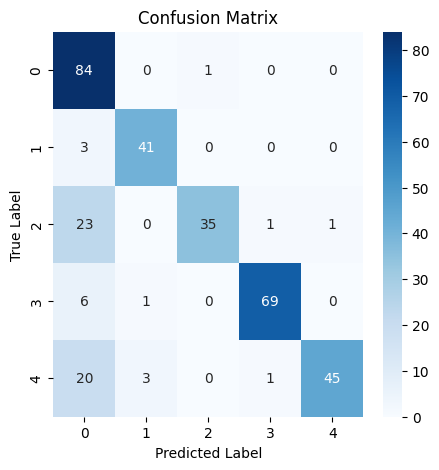

In [23]:
X_test= pad_sequences(X_test, max_seq_length)

predictions = classifier.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1) 
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(5))

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

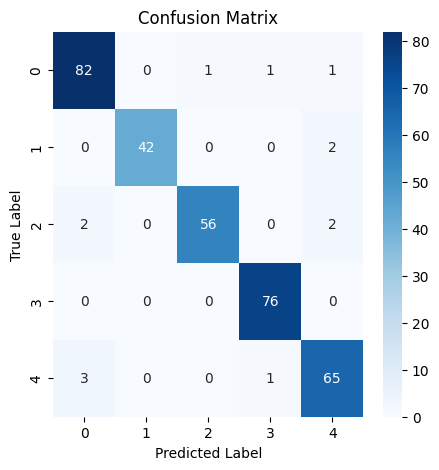

In [25]:
X_test= pad_sequences(X_test, max_seq_length)

predictions = classifier.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1) 
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.arange(5))

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()